In [1]:
%load_ext Cython

----

In [2]:
%%timeit

a = 0
for i in range(1_000_000):
    a += i

32.6 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [3]:
%%timeit
%%cython

cdef unsigned long long int a = 0 #cdef + C/C++ typing
for i in range(1_000_000):
    a += i

15.5 ms ± 413 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


----
# Integrating a Cython Method `f()`

## Pure Python:

In [4]:
def f(x):
    return x ** 2 - x

def integrate_f(a, b, N):
    s = 0
    dx = (b - a) / N
    for i in range(N):
        s += f(a + i * dx)
    return s * dx

In [5]:
%timeit integrate_f(2, 3, 4)

782 ns ± 11.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## Cython types:

In [6]:
%%cython
def f(double x):
    return x ** 2 - x

def integrate_f(double a, double b, int N):
    cdef int i
    cdef double s, dx
    
    s = 0
    dx = (b - a) / N
    for i in range(N):
        s += f(a + i * dx)
    return s * dx

In [7]:
%timeit integrate_f(2, 3, 4)

260 ns ± 5.45 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## Pure Cython:

In [8]:
%%cython
"""
Some form of except-modifier should usually be added, 
otherwise Cython will not be able to propagate exceptions 
raised in the function (or a function it calls). 

The except? -2 means that an error will be checked for 
if -2 is returned (though the ? indicates that -2 may 
also be used as a valid return value). Alternatively, 
the slower except * is always safe. An except clause 
can be left out if the function returns a Python object 
or if it is guaranteed that an exception will not be 
raised within the function call.
"""
cdef double f(double x) except? -2:
    return x ** 2 - x

def integrate_f(double a, double b, int N):
    cdef int i
    cdef double s, dx
    
    s = 0
    dx = (b - a) / N
    for i in range(N):
        s += f(a + i * dx)
    return s * dx

In [9]:
%timeit integrate_f(2, 3, 4)

81.6 ns ± 3.39 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


## Python Function Wrapper:

In [10]:
%%cython
"""
A side-effect of `cdef` is that the function is no longer 
available from Python-space, as Python wouldn’t know how 
to call it. It is also no longer possible to change `f()` 
at runtime.

Using the `cpdef` keyword instead of `cdef`, a Python wrapper 
is also created, so that the function is available both 
from Cython (fast, passing typed values directly) and 
from Python (wrapping values in Python objects). In fact, 
cpdef does not just provide a Python wrapper, it also 
installs logic to allow the method to be overridden by 
python methods, even when called from within cython. 
This does add a tiny overhead compared to cdef methods.
"""
cpdef double f(double x) except? -2:
    return x ** 2 - x

def integrate_f(double a, double b, int N):
    cdef int i
    cdef double s, dx
    
    s = 0
    dx = (b - a) / N
    for i in range(N):
        s += f(a + i * dx)
    return s * dx

In [11]:
%timeit integrate_f(2, 3, 4)

81.3 ns ± 1.83 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


## Cython Profiler:

In [ ]:
%%cython -a
from libc.math cimport sin

cdef double f(double x) except *:
    return sin(x**2)

def integrate_f(double a, double b, int N):
    cdef int i
    cdef double s, dx
    
    s = 0
    dx = (b - a) / N
    for i in range(N):
        s += f(a + i * dx)
    return s * dx

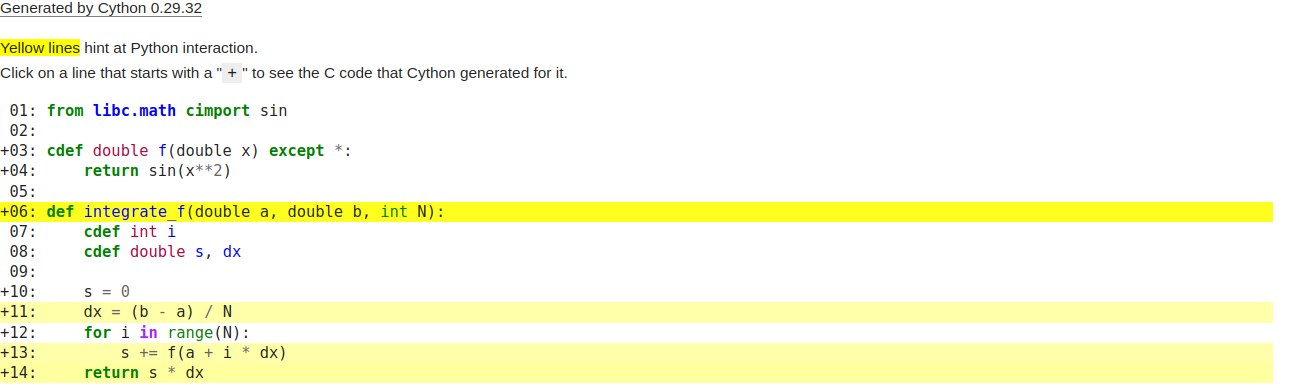

----